# Hospital ER Visits

This Tableau dashboard explores patient visits to the Emergency Room (ER) between April 2019 and October 2020. The goal is to uncover trends and insights related to wait times, patient satisfaction, demographics, and ER usage patterns.



# 📊 Dashboard Overview
The dashboard presents a collection of interactive visualizations built in Tableau to analyze:

1. Total Number of ER Patients during the dataset's time frame.
2. Gender Breakdown of ER visitors, including Female, Male, and Non-conforming identities.
3. Average Patient Satisfaction Score (scale of 0–10) over time.
4. Average Patient Wait Time (in minutes) over time.
5. Aggregated Averages:
  * Total Patient Satisfaction Score
  * Total Patient Wait Time
6. Patient Count by Age Group:
  * 0–18 years
  * 19–34 years
  * 35–59 years
  * 60+ years
7. Hourly Wait Time Patterns:
  * Average patient wait time for every hour weekly and daily
8. Patient Distribution by Race
9. Number of Department Referrals

## Setup and Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset
data = pd.read_csv('/content/Hospital_ER.csv')

# Check first few rows
data.head()


,date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral
0,3/20/2020 8:47,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN
1,6/15/2020 11:29,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN
2,6/20/2020 9:13,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice
3,2/4/2020 22:34,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice
4,9/4/2020 17:48,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics


## Data Cleaning

In [ ]:
# Convert 'date' column to datetime
# Datetime format allows pandas to properly recognize and handle the data as time-based information.
data['date'] = pd.to_datetime(data['date'])

# Remove missing or NaN (Not a Number) values from a DataFrame
data = data.dropna(subset=['patient_age', 'patient_sat_score', 'patient_waittime'])

# Check for duplicates
data = data.drop_duplicates()

# Convert columns to categorical types
# Each column will have its own set of specific categories based on the unique values in that column
data['patient_gender'] = data['patient_gender'].astype('category')
data['patient_race'] = data['patient_race'].astype('category')
data['department_referral'] = data['department_referral'].astype('category')


## Total number of ER Patients during the dataset's time frame

In [ ]:
total_patients = data['patient_id'].nunique()
print(f'Total ER Patients: {total_patients}')

Total ER Patients: 2512


## Gender Breakdown of ER Visitors

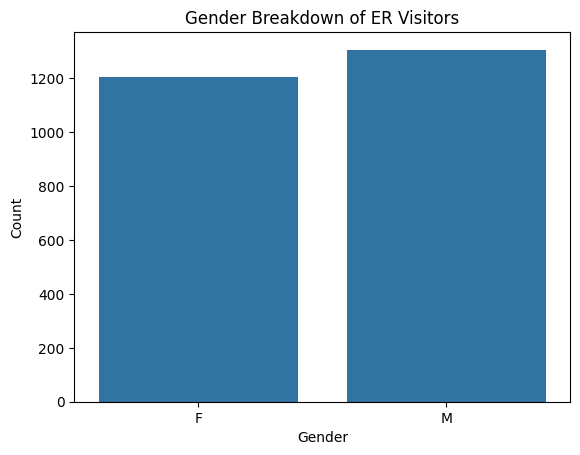

In [ ]:
gender_counts = data['patient_gender'].value_counts()

# Plot the gender breakdown (visualization)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Breakdown of ER Visitors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### **Interpretation**:  
- Male (M) visitors slightly outnumber Female (F) visitors in the ER.  
- Both genders are quite close in count, around 1200–1300 each.

### **Summary**:  
- ER visitation is balanced between male and female, with a slight male majority.

### **Suggestions**:  
- Ensure ER services are gender-inclusive.
- No urgent action needed unless specific gender-related health trends are being investigated.


## Average Patient Satisfaction Score Over Time

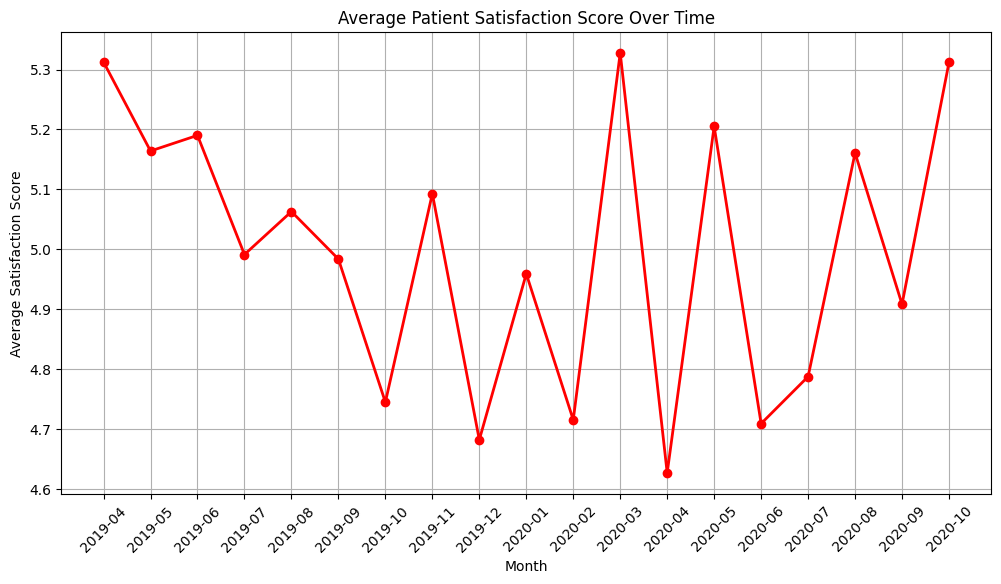

In [ ]:
# Group data by month
data['month'] = data['date'].dt.to_period('M')  # Extract month from 'date' column
monthly_avg = data.groupby('month')['patient_sat_score'].mean()  # Calculate the average satisfaction score per month

# Plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(monthly_avg.index.astype(str), monthly_avg, marker='o', color='red', linestyle='-', linewidth=2, markersize=6)  # Line chart with dots for each point
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.title('Average Patient Satisfaction Score Over Time')  # Chart title
plt.xlabel('Month')  # X-axis label
plt.ylabel('Average Satisfaction Score')  # Y-axis label
plt.grid(True)  # Optional: Add a grid to make the chart easier to read
plt.show()  # Display the plot


### **Interpretation**:  
- Satisfaction fluctuated between 2019–2020.
- Significant drops happened around early 2020 and mid-2020.
- By the end of 2020, scores started bouncing back.

### **Summary**:  
- Patient satisfaction was pretty unstable, with some major drops that could be tied to things like the COVID-19 pandemic.
- After those big drops, scores seemed to recover over time.

### **Suggestions**:  
- Investigate periods of low satisfaction (early 2020) — identify causes (staff shortage, wait times, care quality).
- Maintain factors contributing to satisfaction rebounds.
- Proactive feedback collection during crisis periods could stabilize satisfaction.

## Average Patient Wait Time Over Time (Daily)

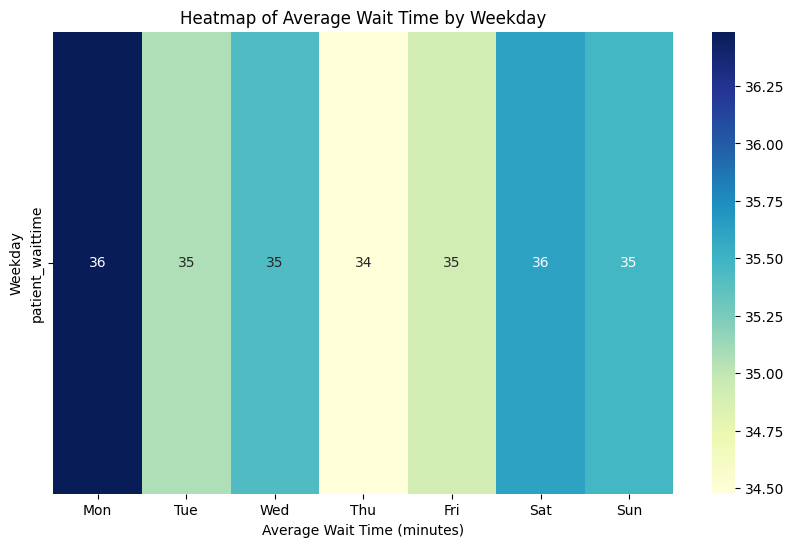

In [ ]:
# Extract the day of the week (0=Monday, ..., 6=Sunday)
data['weekday'] = data['date'].dt.weekday

# Group by weekday and calculate the average wait time
avg_wait_by_day = data.groupby('weekday')['patient_waittime'].mean().reset_index()

# Map weekday numbers to their respective names (0=Monday, 1=Tuesday, ..., 6=Sunday)
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_wait_by_day['weekday'] = avg_wait_by_day['weekday'].map(dict(enumerate(weekday_names)))

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(avg_wait_by_day.set_index('weekday').T, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Average Wait Time by Weekday')
plt.ylabel('Weekday')
plt.xlabel('Average Wait Time (minutes)')
plt.show()


### **Interpretation**:  
- Average wait times are consistently around 34–36 minutes across all weekdays.
- Monday and Saturday have slightly longer wait times (~36 min).

### **Summary**:  
- Wait time is relatively stable across the week.
- Slightly longer waits at the start and during weekends.

### Suggestions:  
- Optimize staff scheduling slightly more on Mondays and Saturdays.
- Promote less busy days (like Thursday) to even out patient flow.

## Average Patient Wait Time Over Time (Hourly)

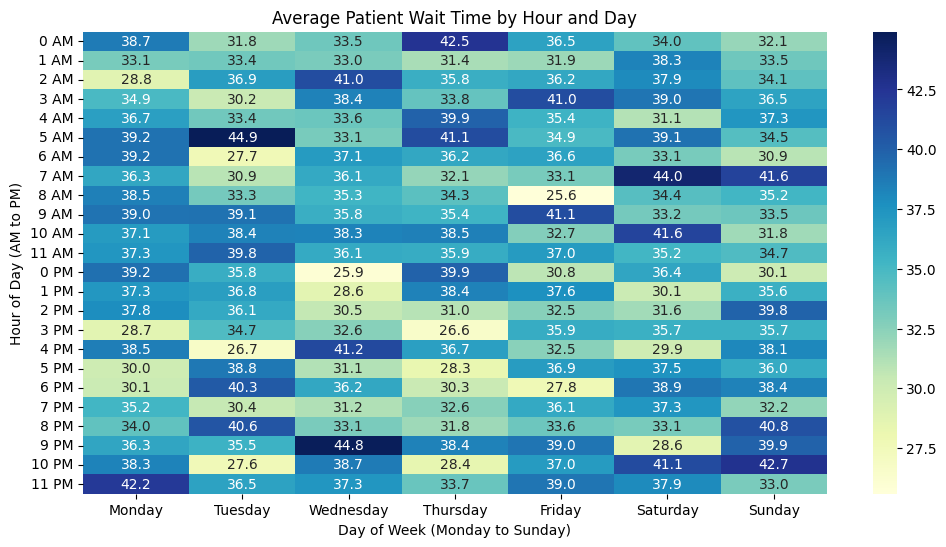

In [ ]:
# Assuming 'data' is your DataFrame
data['date'] = pd.to_datetime(data['date'])

# Extract 'weekday' (Mon=0, Sun=6) and 'hour' from the 'date' column
data['weekday'] = data['date'].dt.day_name()  # Get the weekday name
data['hour'] = data['date'].dt.hour  # Get the hour of the day (0-23)

# Group by weekday and hour, then calculate the average wait time
avg_wait_by_hour = data.groupby(['weekday', 'hour'])['patient_waittime'].mean().reset_index()

# Pivot the table to get the heatmap format (days on the X-axis, hours on the Y-axis)
heatmap_data = avg_wait_by_hour.pivot(index='hour', columns='weekday', values='patient_waittime')

# Reorder the weekdays to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[ordered_days]

# Convert hours (index) to AM/PM format
heatmap_data.index = heatmap_data.index.map(lambda x: f'{x % 12} AM' if x < 12 else f'{(x-12) % 12} PM')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, fmt=".1f")

# Set labels and title
plt.title('Average Patient Wait Time by Hour and Day')
plt.xlabel('Day of Week (Monday to Sunday)')
plt.ylabel('Hour of Day (AM to PM)')

# Show the plot
plt.show()


### **Interpretation**:
- Longest wait times happen early in the morning (5–7 AM) and late at night (10–11 PM).
- Some peak hours differ by day, e.g., Tuesday early morning (5 AM) shows highest wait (44.9 min).
- Midday (11 AM–2 PM) generally has shorter wait times.

### **Summary**:  
- Early mornings and late evenings have longer patient waits.
- Midday is relatively efficient across most days.

### **Suggestions**:
- Increase staffing or streamline triage during early morning (5–7 AM) and late evening shifts.
- If possible, inform patients about less busy times (midday) to manage expectations.
- Review night-shift resources — maybe night staff levels are not matching the inflow.

## Patient Count by Age Group

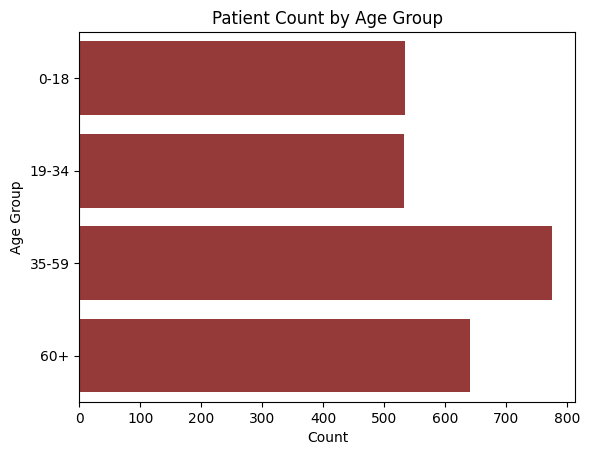

In [ ]:
# Create age groups
bins = [1, 18, 34, 59, np.inf]
labels = ['0-18', '19-34', '35-59', '60+']
data['age_group'] = pd.cut(data['patient_age'], bins=bins, labels=labels)

# Count patiens by age group
age_group_counts = data['age_group'].value_counts()

# Plot
sns.barplot(y=age_group_counts.index, x=age_group_counts.values, orient='h', color='brown')
plt.title('Patient Count by Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

## Patient Distribution by Race (Area Chart)

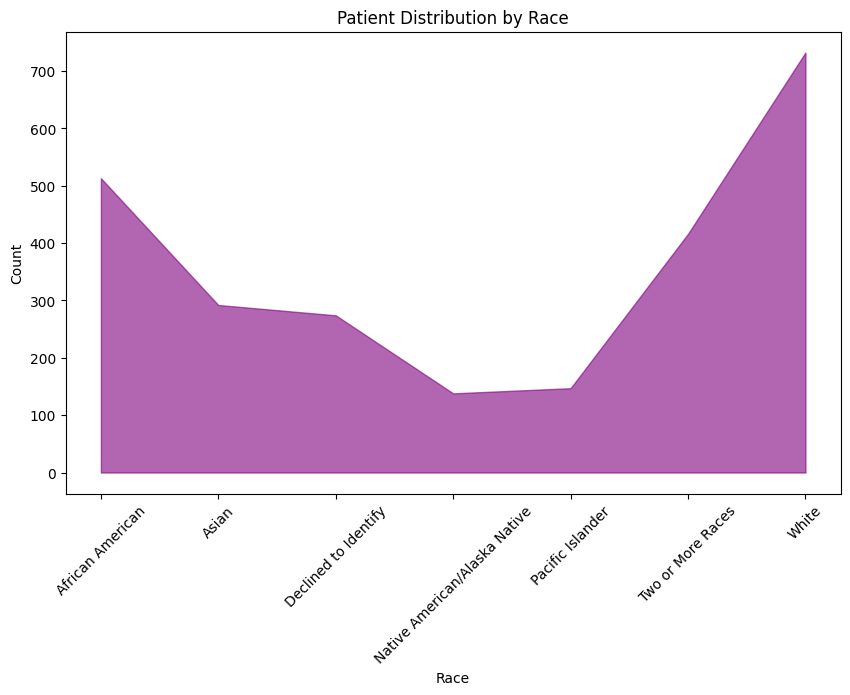

In [ ]:
# Count patients by race
race_counts = data['patient_race'].value_counts().sort_index()

# Plot an area chart
plt.figure(figsize=(10,6))
plt.fill_between(race_counts.index, race_counts.values, color='purple', alpha=0.6)
plt.title('Patient Distribution by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.show()


## Number of Department Referrals (Bubble Chart)

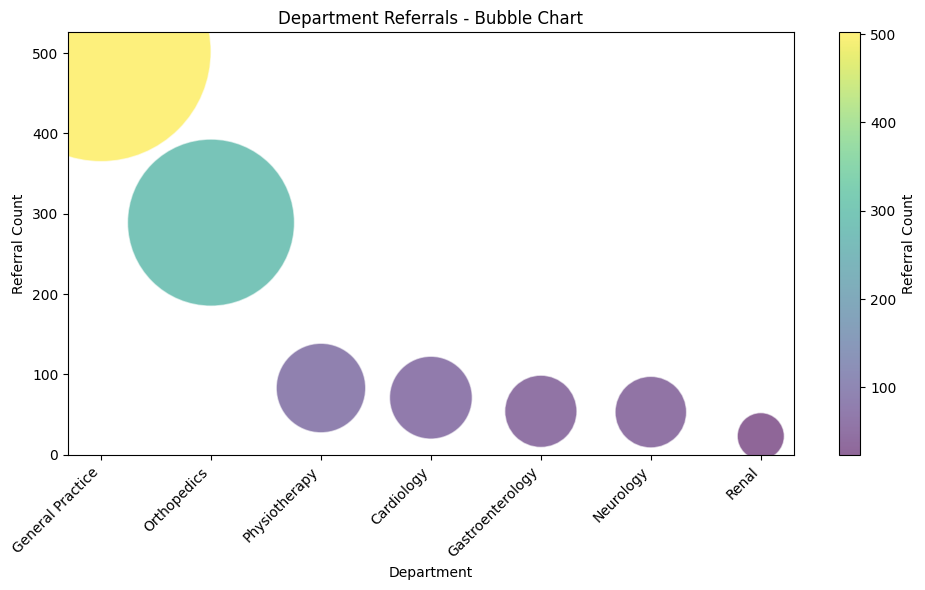

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count department referrals
department_referral_counts = data['department_referral'].value_counts().reset_index()
department_referral_counts.columns = ['Department', 'Count']

# Sort departments by 'Count'
department_referral_counts = department_referral_counts.sort_values(by='Count', ascending=False)

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(department_referral_counts['Department'], department_referral_counts['Count'],
            s=department_referral_counts['Count']*50,  # Bubble size proportional to the count
            c=department_referral_counts['Count'], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=1)

# Customize plot
plt.title('Department Referrals - Bubble Chart')
plt.xlabel('Department')
plt.ylabel('Referral Count')
plt.xticks(rotation=45, ha='right')
plt.colorbar(label='Referral Count')  # Show color bar to indicate count intensity
plt.tight_layout()
plt.show()


In [ ]:
data.to_csv('ER_cleaned_data.csv')

### **Interpretation:**
- **General Practice** has the highest number of referrals, followed by **Orthopedics**.
- Other departments like P**hysiotherapy, Cardiology, Gastroenterology, Neurology, and Renal** have significantly fewer referrals.
- Bubble sizes and colors clearly show that the majority of referrals are concentrated in just the top two departments.

### **Summary:**
- **General Practice and Orthopedics** dominate the referral counts.
- Other specialties have relatively low patient referral rates.

### **Suggestions:**
- Investigate why referrals are highly concentrated in** General Practice and Orthopedics** — is it due to patient demographics, available services, or marketing focus?
- Promote or increase awareness of services in under-referred departments like **Renal and Gastroenterology**.
- Consider resource allocation (staffing, equipment) to support General Practice and Orthopedics due to their heavy demand.